# COMP 590 - Module 2 Assignment
## Bridget Lin

Target Question: How does the burden of drug overdoses differ in the United States over time and within population subgroups?
Data for this project come from CDC data from 1999-2018, which can be retrieved from this link: https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f/resource/48eb6490-5709-43f3-ae4a-3c7d3a4b0c2c?inner_span=True

In [ ]:
# Import pandas and the drug overdose dataset

import pandas as pd

data = pd.read_csv("Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")

In [140]:
#Altair Visualization
import altair as alt

filtered_data = data[(data['AGE'] == 'All ages') & (data['STUB_LABEL'] == 'All persons') & (data['STUB_NAME'] == 'Total')]

panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}

agg_data = filtered_data.groupby(['YEAR', 'PANEL']).agg({'ESTIMATE': 'mean'}).reset_index()
agg_data['PANEL'] = agg_data['PANEL'].replace(panel_mapping)

line_chart = alt.Chart(agg_data).mark_line().encode(
     x=alt.X('YEAR:O', axis=alt.Axis(title='Year')),
    y=alt.Y('ESTIMATE:Q', axis=alt.Axis(title='Deaths per 100,000')),
        color=alt.Color('PANEL:N', legend=alt.Legend(title='Type of Overdose', titleLimit=600, orient='right', columns=1, labelLimit=0))
).properties(
    title='Drug Overdose Death Rates by Year (1999-2018) Based on Type of Overdose',
    width=500  
)

line_chart

alt.Chart(...)

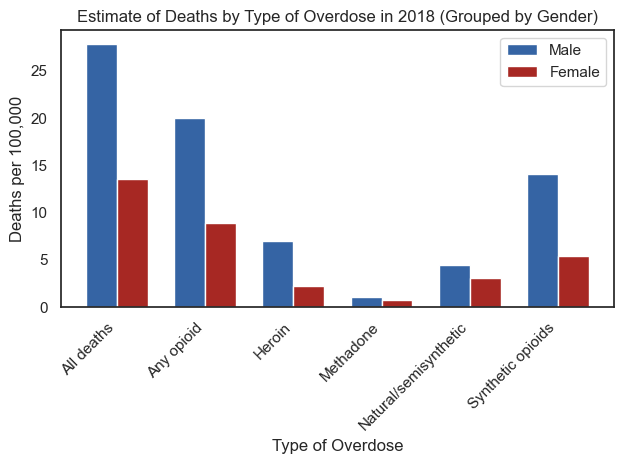

In [144]:
#Matplotlib Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data filtering and re-labeling
filtered_data2 = data[(data['AGE'] == 'All ages') & (data['STUB_NAME'] == 'Sex') & (data['YEAR'] == 2018)]

agg_data2 = filtered_data2.groupby(['YEAR', 'PANEL', 'STUB_LABEL']).agg({'ESTIMATE': 'mean'}).reset_index()

# Panel mapping
panel_mapping = {'All drug overdose deaths' : 'All deaths',
                 'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural/semisynthetic'}

agg_data2['PANEL'] = agg_data2['PANEL'].replace(panel_mapping)

# Subset to data only from 2018
agg_data_2018 = agg_data2[agg_data2['YEAR'] == 2018]

# Group by 'STUB_LABEL' and 'PANEL'
agg_data2_sex = agg_data2.groupby(['STUB_LABEL', 'PANEL']).agg({'ESTIMATE': 'mean'}).reset_index()

# Separate data for male and female groups
agg_data2_male = agg_data2_sex[agg_data2_sex['STUB_LABEL'] == 'Male']
agg_data2_female = agg_data2_sex[agg_data2_sex['STUB_LABEL'] == 'Female']

# Grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.35
x_male = np.arange(len(agg_data2_male['PANEL']))
x_female = x_male + bar_width 

# Create 2 bars, one per gender
male = ax.bar(x_male, agg_data2_male['ESTIMATE'], width=bar_width, label='Male', color='#3564A4')
female = ax.bar(x_female, agg_data2_female['ESTIMATE'], width=bar_width, label='Female', color='#A72823')

# Labeling
ax.set_xlabel('Type of Overdose')
ax.set_ylabel('Deaths per 100,000')
ax.set_title('Estimate of Deaths by Type of Overdose in 2018 (Grouped by Gender)')
ax.set_xticks(x_male + bar_width/2)
ax.set_xticklabels(agg_data2_male['PANEL'], rotation=45, ha='right') 
ax.legend()

# Display the bar chart 
plt.tight_layout()
plt.show()


In [143]:
#Plotly Visualization
import plotly.graph_objects as go
import plotly.express as px

# Data filtering and re-labeling 
filtered_data = data[(data['YEAR'] == 2018) & (data['STUB_NAME'] == 'Age')]

panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}

filtered_data.loc[:, 'PANEL'] = filtered_data['PANEL'].replace(panel_mapping)

fig = px.scatter(x= filtered_data['STUB_LABEL'], y=filtered_data['ESTIMATE'],
	             color=filtered_data["PANEL"])

fig.update_layout(xaxis_title='Age', yaxis_title='Deaths per 100,000')
fig.update_layout(title_text='Drug Overdose Death Rates in 2018 based on Age Group and Type of Overdose', title_x=0.5, title_y=0.95)

fig.show()